<a href="https://colab.research.google.com/github/vinayuppada/AdvanceTimeTable/blob/main/Descriptive_Statistics_and_Visualization%2C_IQR%2C_Skewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset
file_path = "/content/pre_cleaned_financial_dataset.csv"
data = pd.read_csv(file_path)

In [ ]:
# Display basic info and statistics
print("Dataset Overview:\n")
print(data.info())
print("\nStatistical Summary:\n")
print(data.describe())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  1000 non-null   object 
 1   Customer_Age    1000 non-null   int64  
 2   Annual_Income   1000 non-null   int64  
 3   Credit_Score    1000 non-null   int64  
 4   Amount          1000 non-null   float64
 5   Category        1000 non-null   object 
 6   Date            1000 non-null   object 
 7   Region          1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB
None

Statistical Summary:

       Customer_Age  Annual_Income  Credit_Score       Amount
count    1000.00000    1000.000000   1000.000000  1000.000000
mean       43.81900   50863.121000    578.530000    97.500080
std        14.99103   14823.257362    158.711917    96.570872
min        18.00000    6556.000000    300.000000     0.000000
25%        31.00000   408

In [ ]:
# --- Outlier Detection using IQR ---
print("\nOutlier Detection:")
q1 = data['Amount'].quantile(0.25) # Q1 calculation (25th percentile value)
q3 = data['Amount'].quantile(0.75) # 75th Percentile values

iqr = q3 - q1 #interquartile range

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")


Outlier Detection:
Number of outliers detected: 47


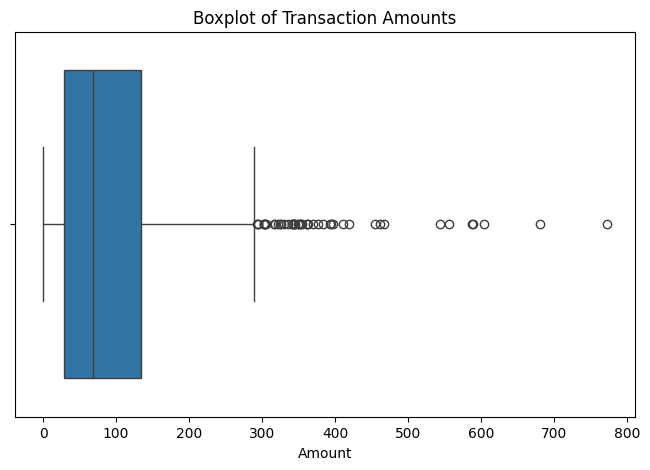

'\n# Box Plot:\n1. Min value\n2. 25th Percentile (Q1)\n3. 50th Percentile (Q2 or Median)\n4. 75th Percentile (Q3)\n5. Max Value\n6. Outliers\n'

In [ ]:
# Visualization of Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Amount'])
plt.title("Boxplot of Transaction Amounts")
plt.show()

'''
# Box Plot:
1. Min value
2. 25th Percentile (Q1)
3. 50th Percentile (Q2 or Median)
4. 75th Percentile (Q3)
5. Max Value
6. Outliers
'''

In [ ]:
# --- Skewness Analysis ---
skewness = data['Amount'].skew()
print(f"Skewness of 'Amount': {skewness}")

Skewness of 'Amount': 2.092433277729862


In [ ]:
np.log(0) # not def

<ipython-input-21-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

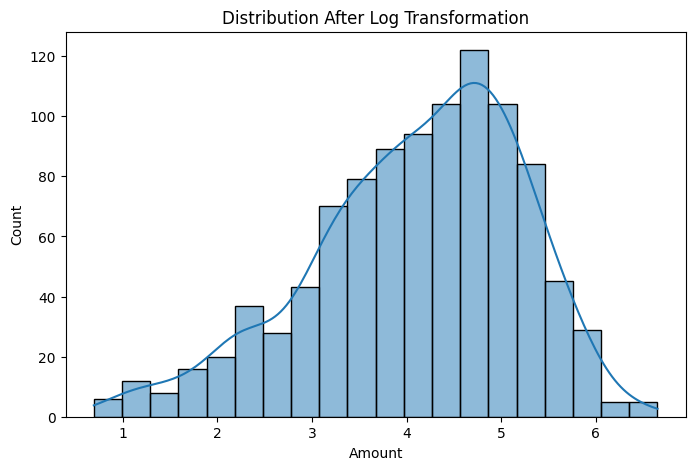

In [ ]:
# Log Transformation
log_transformed = np.log(data['Amount']+2)  # Adding 1 to avoid log(0)
plt.figure(figsize=(8, 5))
sns.histplot(log_transformed, kde=True)
plt.title("Distribution After Log Transformation")
plt.show()

In [ ]:
data['Log_Amount'] = np.log(data['Amount'] + 2)
skewness = data['Log_Amount'].skew()
print(f"Skewness of 'Log_Amount': {skewness}")

Skewness of 'Log_Amount': -0.601049461976598


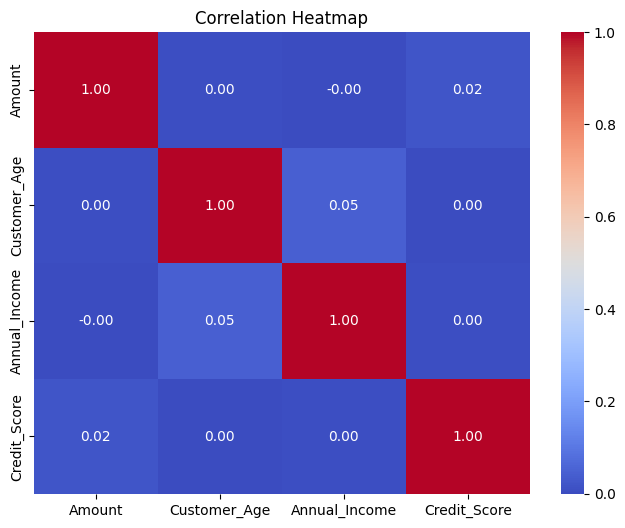

In [ ]:
# --- Correlation Analysis ---
correlation_matrix = data[['Amount', 'Customer_Age', 'Annual_Income', 'Credit_Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

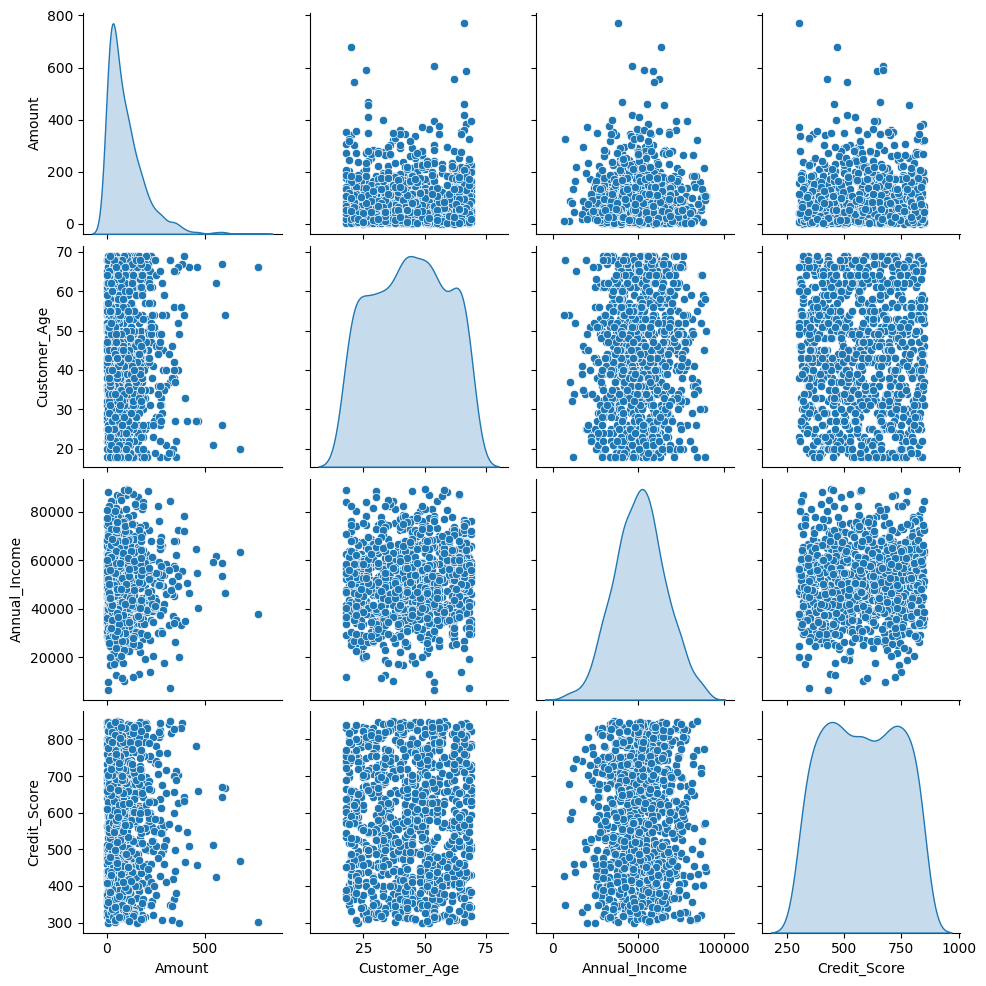

In [ ]:
# --- Pair Plot Visualization ---
sns.pairplot(data[['Amount', 'Customer_Age', 'Annual_Income', 'Credit_Score']], diag_kind='kde')
plt.show()

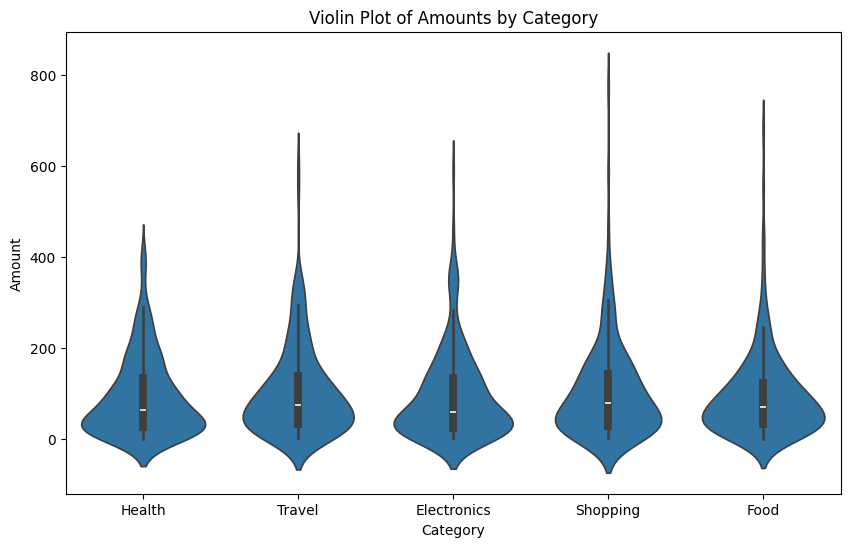

In [ ]:
# --- Violin Plot Visualization ---
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Amount', data=data)
plt.title("Violin Plot of Amounts by Category")
plt.show()

In [ ]:
data.groupby('Category')['Amount'].median().sort_values(ascending=False)

,Amount
Category,
Shopping,78.640
Travel,75.100
Food,69.390
Health,62.955
Electronics,59.475


In [ ]:
# --- Case Study Insights ---
print("Case Study Insights:")
print(f"Mean Transaction Amount: {data['Amount'].mean()}\n")
print(f"Categories with Highest Median Transactions:\n{data.groupby('Category')['Amount'].median().sort_values(ascending=False)}")
print("\nAddressing Skewness:")
print("Using log transformation significantly reduced skewness and made the distribution more normal.")

Case Study Insights:
Mean Transaction Amount: 97.50008

Categories with Highest Median Transactions:
Category
Shopping       78.640
Travel         75.100
Food           69.390
Health         62.955
Electronics    59.475
Name: Amount, dtype: float64

Addressing Skewness:
Using log transformation significantly reduced skewness and made the distribution more normal.


In [ ]:
# Save transformed data
transformed_data = data.copy()
transformed_data['Log_Amount'] = log_transformed
transformed_data.to_csv("transformed_financial_dataset.csv", index=False)
print("Transformed data saved to 'transformed_financial_dataset.csv'")

Transformed data saved to 'transformed_financial_dataset.csv'
